## About this file
1. longitude: A measure of how far west a house is; a higher value is farther west
2. latitude: A measure of how far north a house is; a higher value is farther north
3. housingMedianAge: Median age of a house within a block; a lower number is a newer building
4. totalRooms: Total number of rooms within a block
5. totalBedrooms: Total number of bedrooms within a block
6. population: Total number of people residing within a block
7. households: Total number of households, a group of people residing within a home unit, for a block
8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
9. medianHouseValue: Median house value for households within a block (measured in US Dollars)
10. oceanProximity: Location of the house w.r.t ocean/sea

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
housing = pd.read_csv("housing.csv", sep=',')
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
housing.describe(include='all')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1H OCEAN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9136
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,NaN
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,NaN
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,NaN
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,NaN
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,NaN
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,NaN


In [5]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [6]:
housing['total_bedrooms'].fillna(housing['total_bedrooms'].mean(),inplace=True)
housing.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

## Data Normalization

In [7]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [8]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

def normalize_with_log(df,columns):
    df1 = df.copy()
    for col in columns:
        df1[col] = np.log(df1[col]+1)
    return df1

cols_to_normalize = ['total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
housing1 = normalize_with_log(housing, cols_to_normalize)
housing1.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,6.781058,4.867534,5.777652,4.844187,2.232720,452600.0,NEAR BAY
1,-122.22,37.86,21.0,8.867850,7.009409,7.784057,7.037906,2.230165,358500.0,NEAR BAY
2,-122.24,37.85,52.0,7.291656,5.252273,6.208590,5.181784,2.111110,352100.0,NEAR BAY
3,-122.25,37.85,52.0,7.150701,5.463832,6.326149,5.393628,1.893579,341300.0,NEAR BAY
4,-122.25,37.85,52.0,7.395108,5.638355,6.338594,5.560682,1.578195,342200.0,NEAR BAY


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

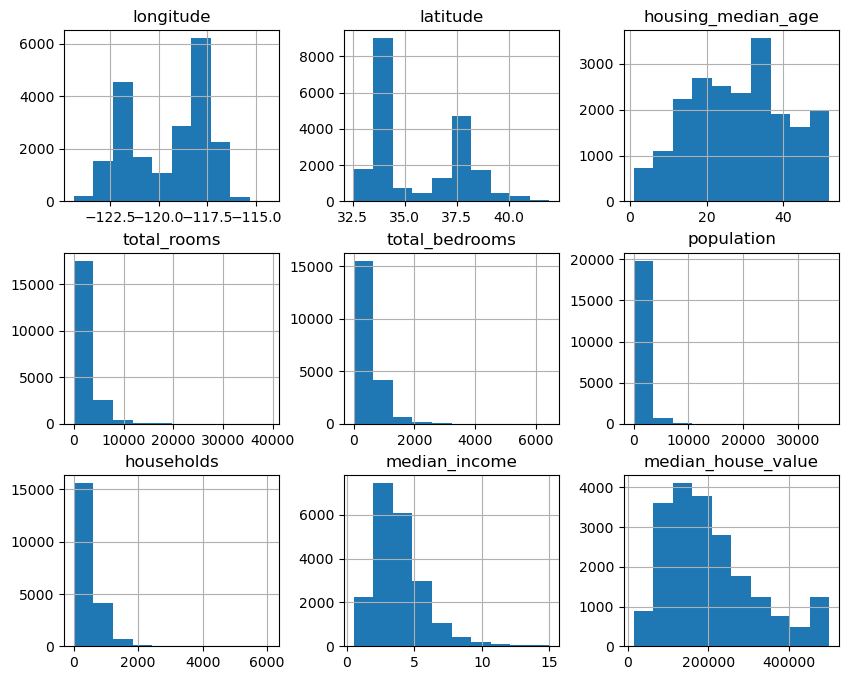

In [9]:
housing.hist(figsize=(10,8))

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

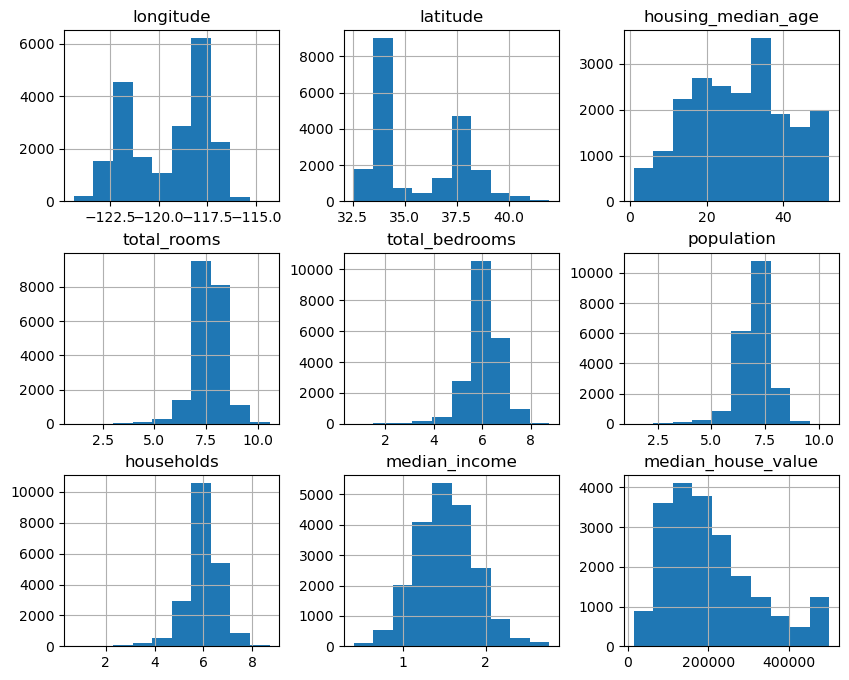

In [10]:
housing1.hist(figsize=(10,8))

### Use pandas get_dummies to uncategorize ocean_proximity

In [11]:
housing1.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [12]:
ocean_proximity_categorical = pd.get_dummies(housing1.ocean_proximity).astype(int)
ocean_proximity_categorical[:5]

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0


In [13]:
housing = housing1.join(ocean_proximity_categorical)
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,6.781058,4.867534,5.777652,4.844187,2.232720,452600.0,NEAR BAY,0,0,0,1,0
1,-122.22,37.86,21.0,8.867850,7.009409,7.784057,7.037906,2.230165,358500.0,NEAR BAY,0,0,0,1,0
2,-122.24,37.85,52.0,7.291656,5.252273,6.208590,5.181784,2.111110,352100.0,NEAR BAY,0,0,0,1,0
3,-122.25,37.85,52.0,7.150701,5.463832,6.326149,5.393628,1.893579,341300.0,NEAR BAY,0,0,0,1,0
4,-122.25,37.85,52.0,7.395108,5.638355,6.338594,5.560682,1.578195,342200.0,NEAR BAY,0,0,0,1,0


In [14]:
housing.drop(['ocean_proximity'], axis=1, inplace=True)
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,6.781058,4.867534,5.777652,4.844187,2.232720,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,8.867850,7.009409,7.784057,7.037906,2.230165,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,7.291656,5.252273,6.208590,5.181784,2.111110,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,7.150701,5.463832,6.326149,5.393628,1.893579,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,7.395108,5.638355,6.338594,5.560682,1.578195,342200.0,0,0,0,1,0


<Axes: >

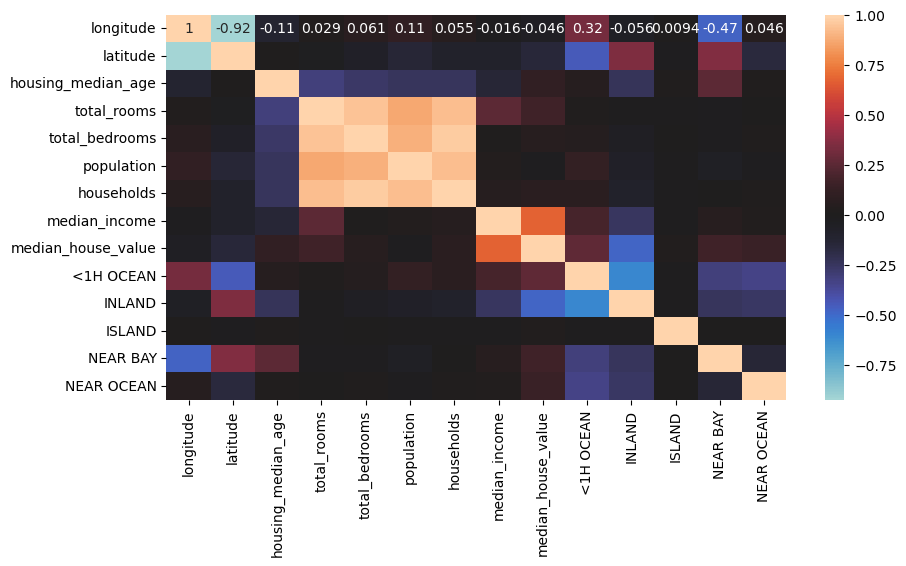

In [15]:
plt.figure(figsize=(10,5))
sns.heatmap(housing.corr(),annot=True,center=0)

<Axes: xlabel='latitude', ylabel='longitude'>

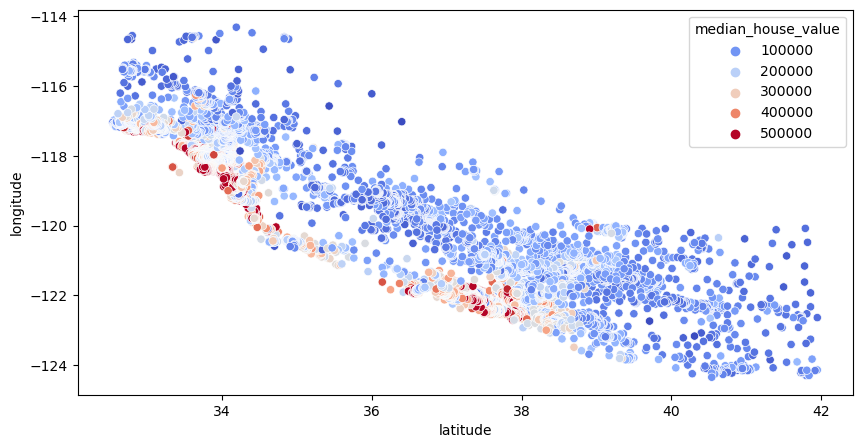

In [16]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='latitude', y='longitude', data= housing,hue='median_house_value', palette='coolwarm')

## Création du modèle

In [17]:
X = housing.drop(['median_house_value'], axis=1)
y = housing['median_house_value']

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.25)
print(X_train.shape, X_test.shape,Y_train.shape,Y_test.shape)

(15480, 13) (5160, 13) (15480,) (5160,)


# LinearRegression

In [19]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

reg.fit(X_train, Y_train)

LinearRegression()

In [20]:
reg.score(X_train, Y_train)

0.6430650317763387

In [21]:
reg.score(X_test, Y_test)

0.6145386367277792

In [22]:
Y_pred = reg.predict(X_test)
lreg_data =pd.DataFrame({'y_test':Y_test,'Y_pred':Y_pred})
lreg_data.head()

,y_test,Y_pred
11564,192500.0,273365.299686
911,287600.0,280468.162651
653,180000.0,266852.218993
18236,276000.0,231084.704852
3491,222900.0,272681.052579


# DecisionTreeRegressor

In [23]:
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor(random_state=0)
dt_model.fit(X_train, Y_train)

DecisionTreeRegressor(random_state=0)

In [24]:
dt_model.score(X_train,Y_train)

1.0

In [25]:
dt_model.score(X_test,Y_test)

0.6261059625016622

# RandomForestRegressor

In [26]:
from sklearn.ensemble import RandomForestRegressor
rfr_model = RandomForestRegressor()
rfr_model.fit(X_train, Y_train)

RandomForestRegressor()

In [27]:
rfr_model.score(X_train,Y_train)

0.9755392246675136

In [28]:
rfr_model.score(X_test,Y_test)

0.8138843386004208

In [29]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,6.781058,4.867534,5.777652,4.844187,2.232720,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,8.867850,7.009409,7.784057,7.037906,2.230165,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,7.291656,5.252273,6.208590,5.181784,2.111110,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,7.150701,5.463832,6.326149,5.393628,1.893579,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,7.395108,5.638355,6.338594,5.560682,1.578195,342200.0,0,0,0,1,0


In [30]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY',
       'NEAR OCEAN'],
      dtype='object')

# Hyper Parameter Tunning

### GridSearchCV pour RandomForest

In [31]:
from sklearn.model_selection import GridSearchCV
import numpy as np

rf_reg = RandomForestRegressor()

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [32]:
grid_search = GridSearchCV(estimator=rf_reg, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2,
                           scoring='neg_mean_squared_error')

In [33]:
grid_search.fit(X_train, Y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


KeyboardInterrupt: 

In [ ]:
best_model = grid_search.best_estimator_
best_model

In [ ]:
grid_search.best_params_

In [ ]:
print (f'Train Accuracy - : {best_model.score(X_train,Y_train):.3f}')
print (f'Test Accuracy - : {best_model.score(X_test,Y_test):.3f}')

## GridSearchCV for Decision Tree

In [ ]:
dtree_reg = DecisionTreeRegressor()

# Define the parameter grid to tune the hyperparameters
param_grid = {
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
grid_search = GridSearchCV(estimator=dtree_reg, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
grid_search.fit(X_train, Y_train)

In [ ]:
dt_best_model = grid_search.best_estimator_
dt_best_model

In [ ]:
print (f'Train Accuracy - : {dt_best_model.score(X_train,Y_train):.3f}')
print (f'Test Accuracy - : {dt_best_model.score(X_test,Y_test):.3f}')